In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import scikitplot
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# first we explore and process data, only then split into train and test

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None)
data = dataset.iloc[:, :-1].astype(int)
target = dataset.iloc[:, -1]

In [3]:
# First 5 rows of our dataset
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


#### Check basic stats

Methods `describe` and `info` deliver some useful information.

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,422.500000,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,244.363459,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,211.250000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,422.500000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,633.750000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       846 non-null    int64
 1   1       846 non-null    int64
 2   2       846 non-null    int64
 3   3       846 non-null    int64
 4   4       846 non-null    int64
 5   5       846 non-null    int64
 6   6       846 non-null    int64
 7   7       846 non-null    int64
 8   8       846 non-null    int64
 9   9       846 non-null    int64
 10  10      846 non-null    int64
 11  11      846 non-null    int64
 12  12      846 non-null    int64
 13  13      846 non-null    int64
 14  14      846 non-null    int64
 15  15      846 non-null    int64
 16  16      846 non-null    int64
 17  17      846 non-null    int64
 18  18      846 non-null    int64
dtypes: int64(19)
memory usage: 125.7 KB


### Check target distribution - vehicle silhouettes

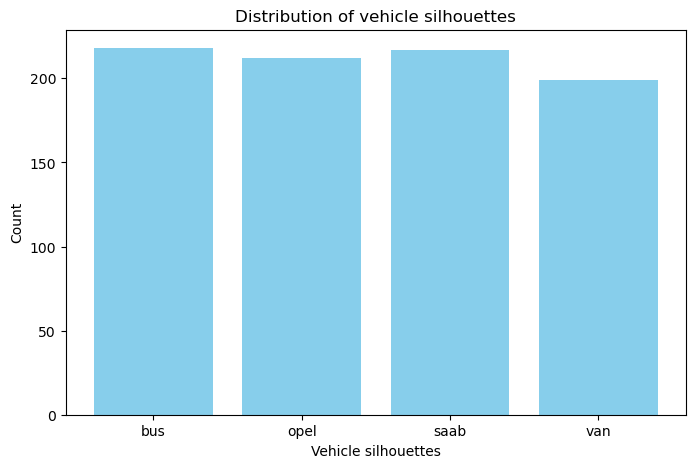

In [6]:
unique_categories, counts = np.unique(target, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(unique_categories, counts, color='skyblue')

plt.xlabel("Vehicle silhouettes")
plt.ylabel("Count")
plt.title("Distribution of vehicle silhouettes")

plt.show()

### Check feature distribution

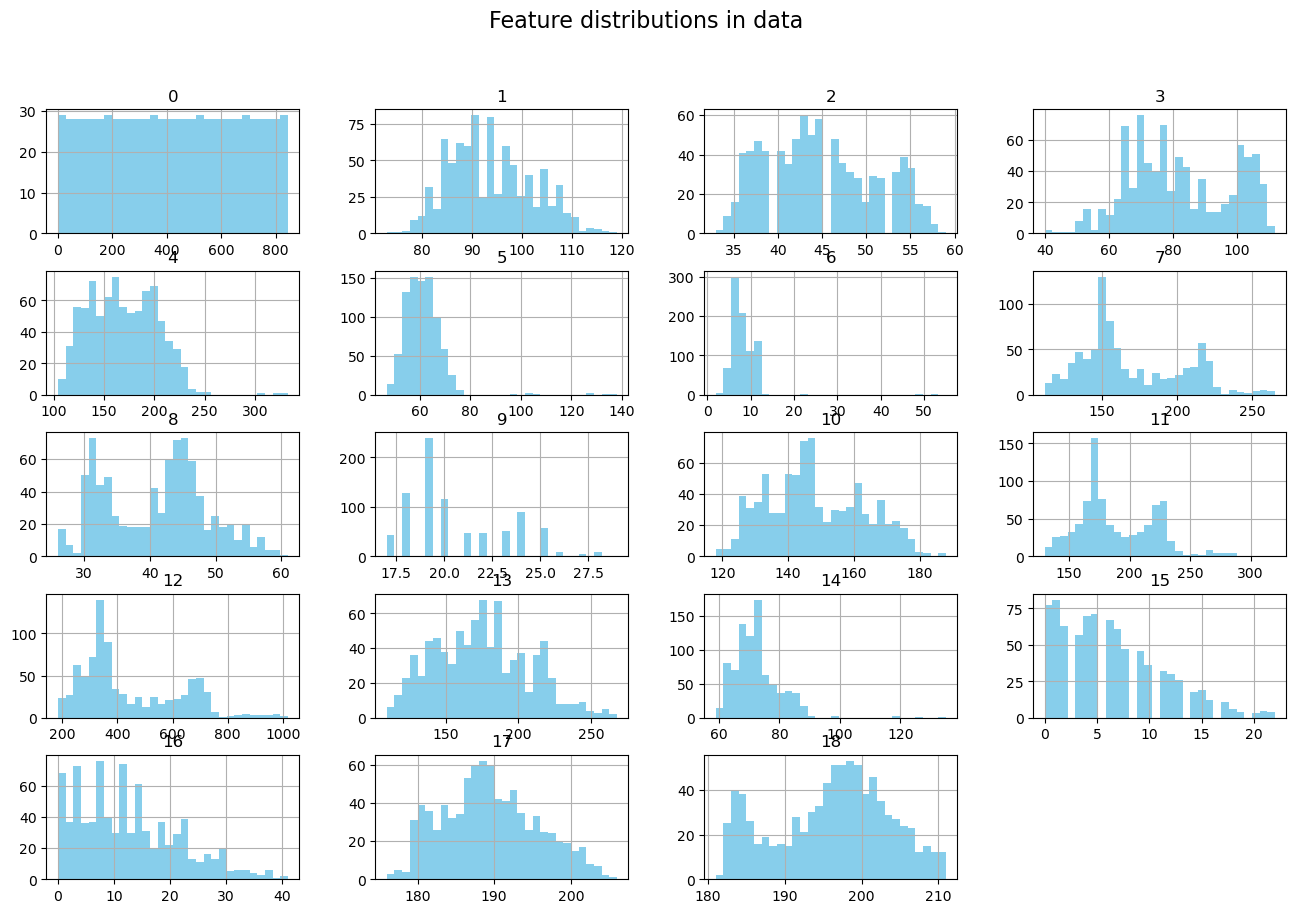

In [7]:
# Plot histograms for all features
data.hist(bins=30, figsize=(16, 10), color='skyblue')
plt.suptitle("Feature distributions in data", fontsize=16)
plt.show()

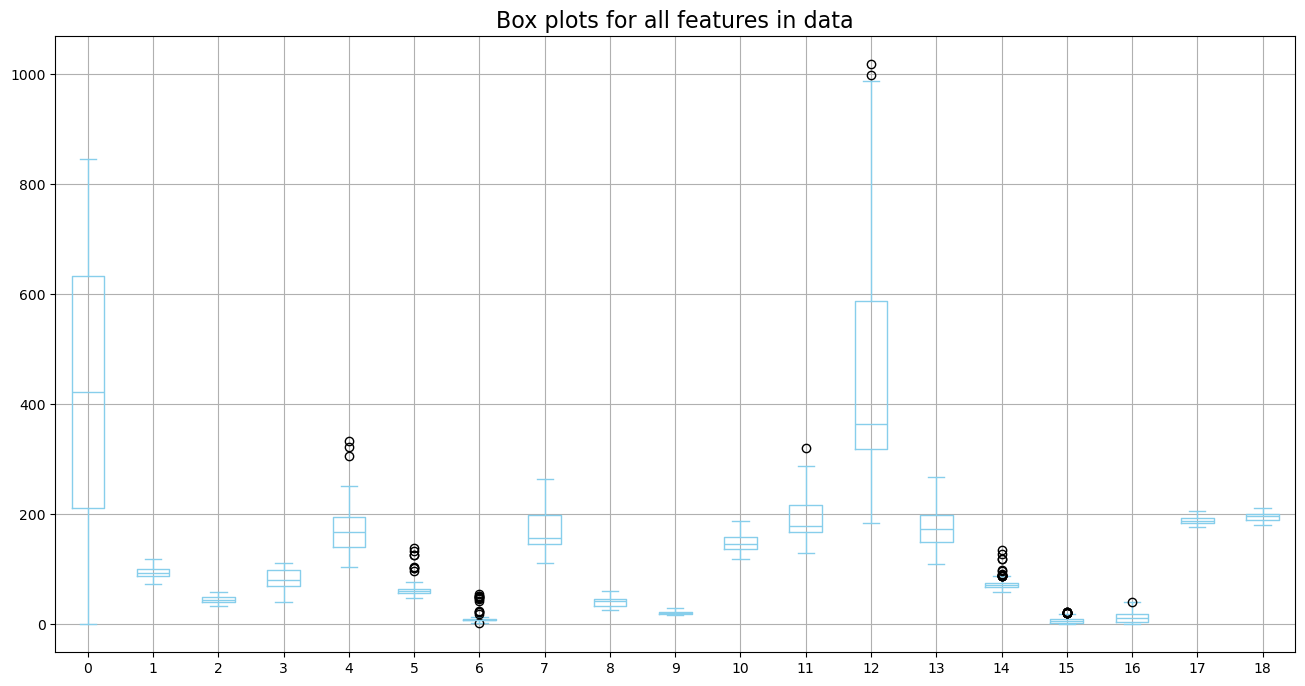

In [8]:
# Create a box plot for all features
plt.figure(figsize=(16, 8))
data.boxplot(color='skyblue')
plt.title("Box plots for all features in data", fontsize=16)
plt.show()

### Heat map

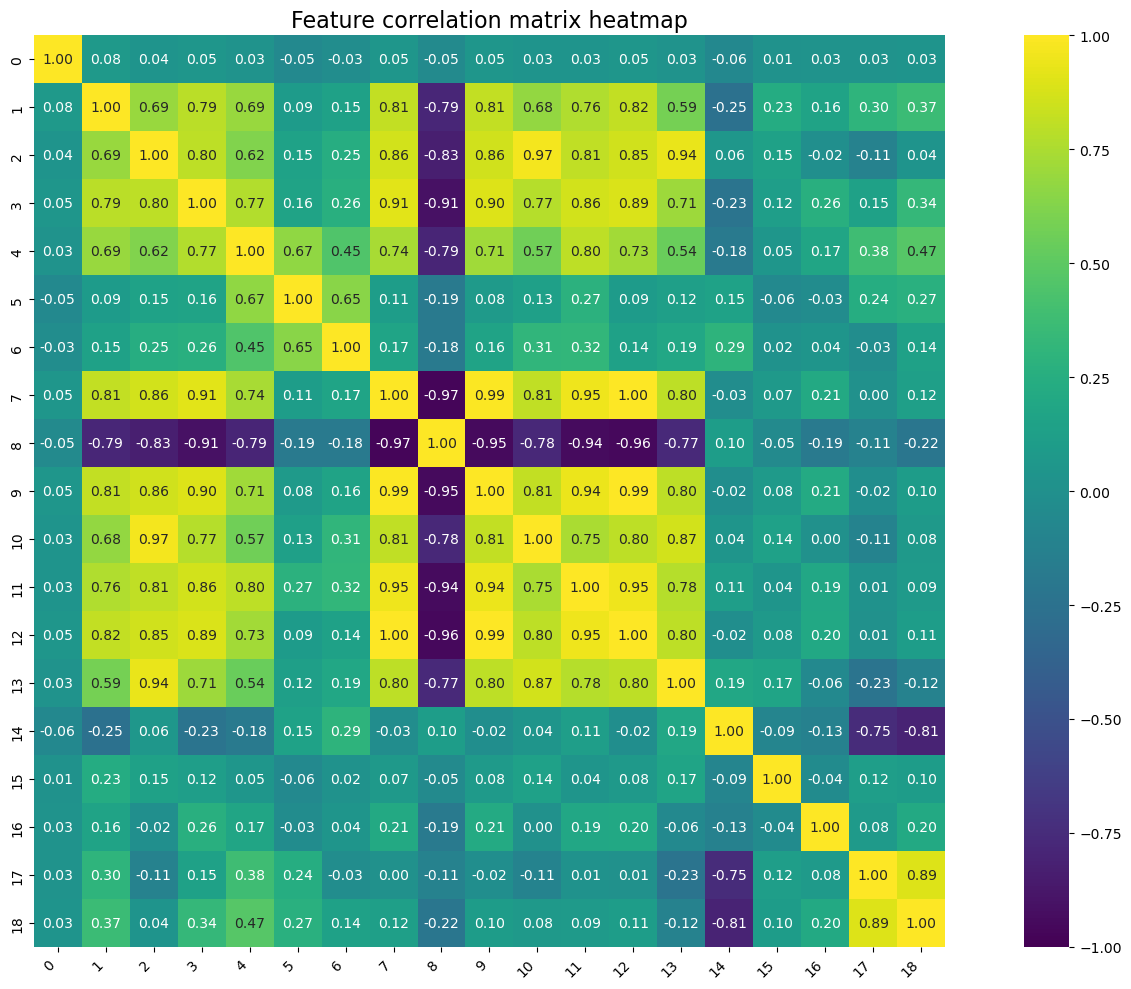

In [9]:
corr = data.corr()

plt.figure(figsize=(16, 10))

sns.heatmap(
    corr,
    annot=True,    
    fmt=".2f",
    cmap="viridis",
    vmin=-1, vmax=1,
    square=True
)

plt.title("Feature correlation matrix heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()                   
plt.show()


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
Make some transformations of the dataset (if necessary). Briefly explain the transformations.

Findings and data processing:

* there are no null values
* all features are numerical, but in different numeric range, feature standardization is requered since we are going to build logistic regression
* most features don’t look normally distributed
* many features have outliers; since we don't know the nature of these outliers, for now we will keep them in order not to lose important information
* some features are highly correllated
* target is string type, converting into numerical labels

#### Scaling

In [10]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.730005,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957
1,-1.725910,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977
2,-1.721815,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447
3,-1.717721,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056
4,-1.713626,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181


####  Encode target

In [11]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(target)

In [12]:

X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 19) (549,) (297, 19) (297,)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [13]:
### YOUR CODE HERE
base_lr = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    estimator=base_lr,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_lr = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10.0, 'penalty': 'l2'}


In [14]:
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test Accuracy: {accuracy:.3f}")
print(f"Test F1 Score: {f1:.3f}")

Test Accuracy: 0.778
Test F1 Score: 0.781


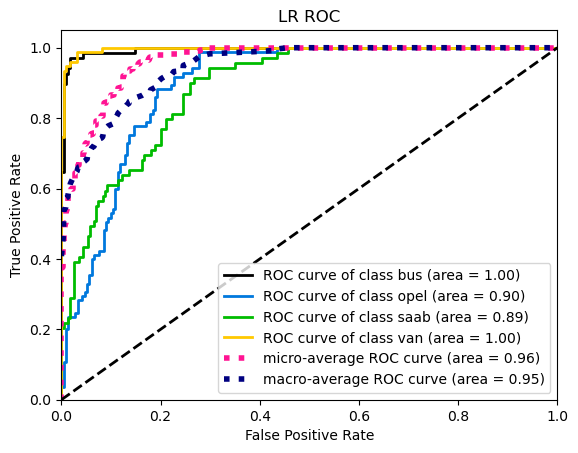

In [16]:
scikitplot.metrics.plot_roc(y_test, y_proba, title="LR ROC")
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

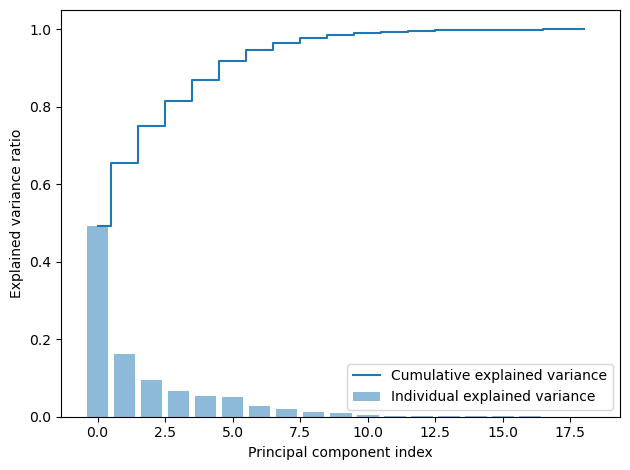

In [17]:
pca = PCA()
pca.fit(X_train)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [18]:
### YOUR CODE HERE
# 7 or 8 components capture ~ 95% of the variance
# data should be normilixed and it is already done previously


pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [19]:
### YOUR CODE HERE
grid_search.fit(X_train_pca, y_train)

best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10.0, 'penalty': 'l1'}


In [20]:
y_pred = best_lr.predict(X_test_pca)
y_proba = best_lr.predict_proba(X_test_pca)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test Accuracy: {accuracy:.3f}")
print(f"Test F1 Score: {f1:.3f}")

Test Accuracy: 0.623
Test F1 Score: 0.611


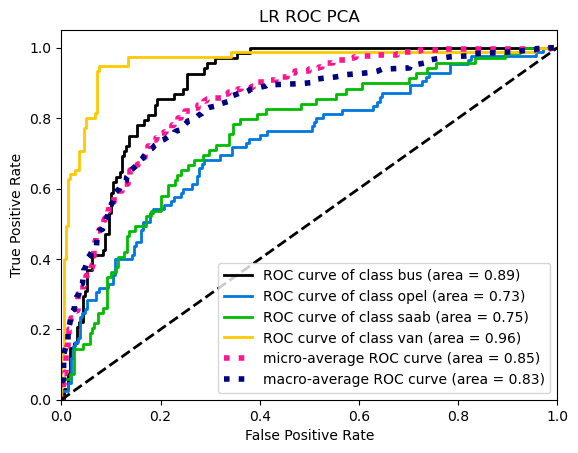

In [22]:
scikitplot.metrics.plot_roc(y_test, y_proba, title="LR ROC PCA")
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [23]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [2, 4, 6, 8, 10, None]}
grid_search = GridSearchCV(dt, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10}


In [24]:
y_pred = best_dt.predict(X_test)

In [25]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test Accuracy: {acc:.3f}")
print(f"Test F1 Score: {f1:.3f}")

Test Accuracy: 0.663
Test F1 Score: 0.666


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [26]:
# YOUR CODE HERE
lr_accuracies = []
lr_f1_scores = []
dt_accuracies = []
dt_f1_scores = []
ensemble_sizes = range(2, 101, 5)

for n in ensemble_sizes:
    bag_lr = BaggingClassifier(estimator=best_lr, n_estimators=n, bootstrap=True, random_state=42)
    bag_lr.fit(X_train, y_train)
    y_pred_lr = bag_lr.predict(X_test)
    lr_accuracies.append(accuracy_score(y_test, y_pred_lr))
    lr_f1_scores.append(f1_score(y_test, y_pred_lr, average='macro'))
    
    bag_dt = BaggingClassifier(estimator=best_dt, n_estimators=n, bootstrap=True, random_state=42)
    bag_dt.fit(X_train, y_train)
    y_pred_dt = bag_dt.predict(X_test)
    dt_accuracies.append(accuracy_score(y_test, y_pred_dt))
    dt_f1_scores.append(f1_score(y_test, y_pred_dt, average='macro'))

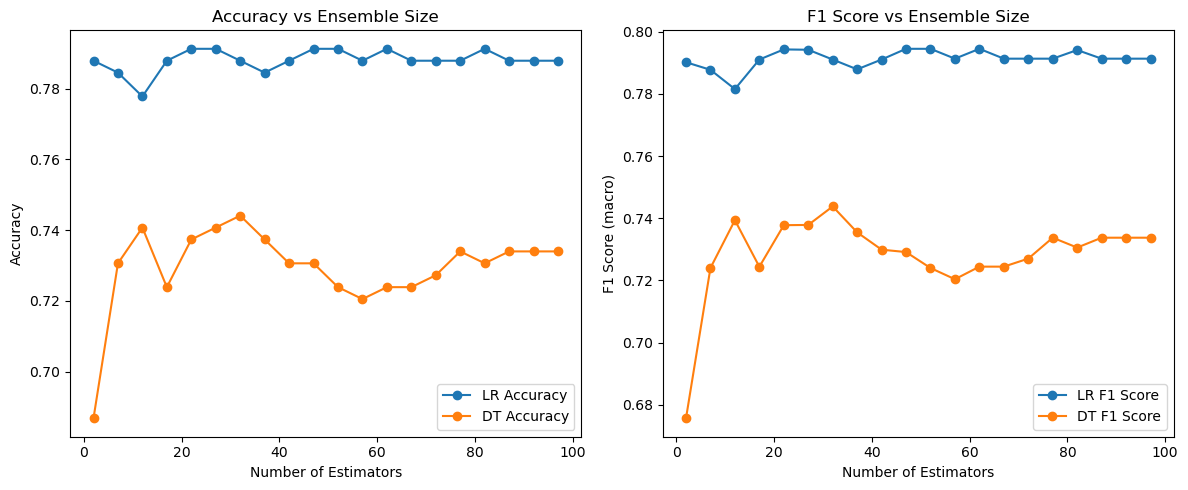

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, lr_accuracies, marker='o', label="LR Accuracy")
plt.plot(ensemble_sizes, dt_accuracies, marker='o', label="DT Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Ensemble Size")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, lr_f1_scores, marker='o', label="LR F1 Score")
plt.plot(ensemble_sizes, dt_f1_scores, marker='o', label="DT F1 Score")
plt.xlabel("Number of Estimators")
plt.ylabel("F1 Score (macro)")
plt.title("F1 Score vs Ensemble Size")
plt.legend()

plt.tight_layout()
plt.show()

#### Bagging results:

* both lr and decision tree ensembles tends to stabilize beyond 15-20 estimators
* adding more than 15-20 models doesn't imporove accuracy or F1

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)


In [29]:
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
y_pred = best_rf.predict(X_test)

In [31]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test Accuracy: {acc:.3f}")
print(f"Test F1 Score: {f1:.3f}")

Test Accuracy: 0.714
Test F1 Score: 0.714


* Optimal number of trees is 10
* It is lower than lower than the ensemble sizes in 2.6 (15-20)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [32]:
# YOUR CODE HERE

n_parts = 10
indices = np.arange(len(X_train))
np.random.shuffle(indices)
parts = np.array_split(indices, n_parts)

In [33]:
lr_acc = []
lr_f1 = []
dt_acc = []
dt_f1 = []
rf_acc = []
rf_f1 = []
train_sizes = []

In [34]:
for i in range(1, n_parts + 1):
    current_idx = np.concatenate(parts[:i])
    train_sizes.append(len(current_idx))

    X_sub = X_train.iloc[current_idx]
    y_sub = y_train.iloc[current_idx]

    model_lr = clone(best_lr)
    model_lr.fit(X_sub, y_sub)
    y_pred_lr = model_lr.predict(X_test)
    lr_acc.append(accuracy_score(y_test, y_pred_lr))
    lr_f1.append(f1_score(y_test, y_pred_lr, average='macro'))

    model_dt = clone(best_dt)
    model_dt.fit(X_sub, y_sub)
    y_pred_dt = model_dt.predict(X_test)
    dt_acc.append(accuracy_score(y_test, y_pred_dt))
    dt_f1.append(f1_score(y_test, y_pred_dt, average='macro'))

    model_rf = clone(best_rf)
    model_rf.fit(X_sub, y_sub)
    y_pred_rf = model_rf.predict(X_test)
    rf_acc.append(accuracy_score(y_test, y_pred_rf))
    rf_f1.append(f1_score(y_test, y_pred_rf, average='macro'))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


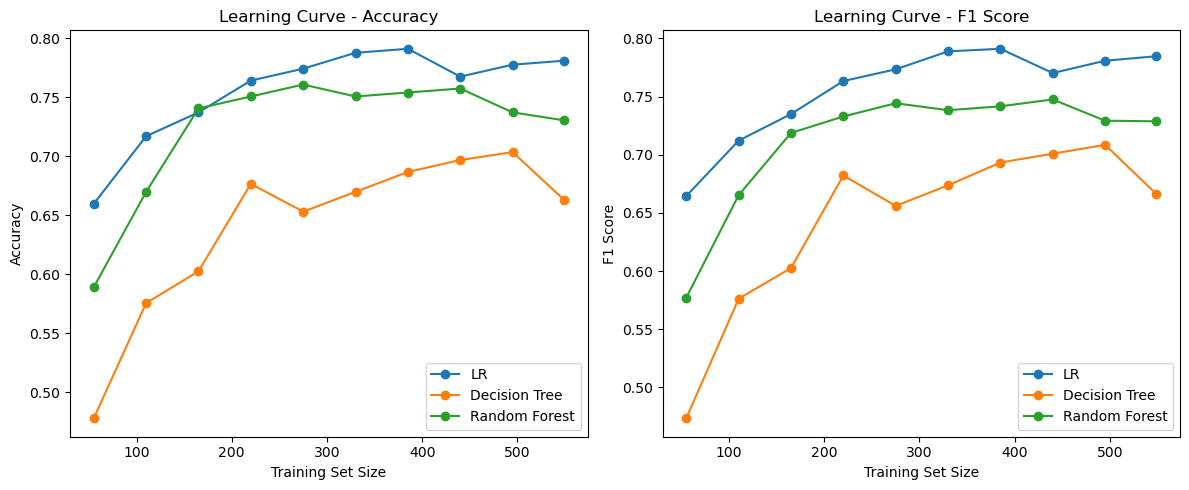

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(train_sizes, lr_acc, marker='o', label='LR')
plt.plot(train_sizes, dt_acc, marker='o', label='Decision Tree')
plt.plot(train_sizes, rf_acc, marker='o', label='Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_sizes, lr_f1, marker='o', label='LR')
plt.plot(train_sizes, dt_f1, marker='o', label='Decision Tree')
plt.plot(train_sizes, rf_f1, marker='o', label='Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve - F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

Conclusions:
* for all models as the training set size increases the metrics are impoving
* logistic regression achieves the highest final performance